In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/marcostellez/code/abefarkas/Thalassa_Regime_Classifier/raw_data/data_set.csv')

In [3]:
data.head()

,Unnamed: 0,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,...,ap16,as16,ap17,as17,ap18,as18,ap19,as19,ap20,as20
0,0,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,0.505087,...,28724.006522,0.418891,28724.167391,0.487558,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145
1,1,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,0.737259,...,28760.520690,7.383086,28760.674138,4.193586,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017
2,2,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,0.382467,...,28787.931667,0.427633,28788.138333,0.580383,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300
3,3,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,0.325300,...,28793.874833,0.486350,28794.093333,0.346800,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067
4,4,2022-05-19 00:02:15,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,0.232483,...,28792.984483,0.383293,28793.143103,0.595362,28793.387931,0.417172,28793.587931,0.473741,28793.763793,0.417776


In [4]:
# Weighted Average Price
data['WAP'] = (data['bp1']*data['bs1']
               +data['bp2']*data['bs2']
               +data['ap1']*data['as1']
               +data['ap2']*data['as2'])/(data['bs1']+
                                         data['bs2']+
                                         data['as1']+
                                         data['as2'])

In [5]:
data['spread'] = ((data['ap1']/data['bp1']) - 1)

In [6]:
data

,Unnamed: 0,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,...,ap17,as17,ap18,as18,ap19,as19,ap20,as20,WAP,spread
0,0,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,0.505087,...,28724.167391,0.487558,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145,28720.131688,0.000015
1,1,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,0.737259,...,28760.674138,4.193586,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017,28756.179152,0.000010
2,2,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,0.382467,...,28788.138333,0.580383,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300,28782.777221,0.000005
3,3,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,0.325300,...,28794.093333,0.346800,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067,28789.546017,0.000005
4,4,2022-05-19 00:02:15,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,0.232483,...,28793.143103,0.595362,28793.387931,0.417172,28793.587931,0.473741,28793.763793,0.417776,28788.543348,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2875,2022-05-19 23:57:45,30338.635000,3.969417,30338.193333,0.415267,30337.791667,0.198983,30337.486667,0.348533,...,30341.966667,0.526467,30342.106667,1.050233,30342.235000,1.085950,30342.378333,0.718317,30338.642871,0.000003
2876,2876,2022-05-19 23:58:15,30326.763333,1.418667,30326.355000,0.436217,30325.738333,0.299033,30325.345000,0.070417,...,30330.665000,0.743667,30330.831667,1.051067,30331.013333,0.843717,30331.190000,1.326483,30326.837494,0.000003
2877,2877,2022-05-19 23:58:45,30319.180000,2.653744,30318.591111,0.620722,30318.086667,0.219122,30317.767222,0.326067,...,30322.896111,0.453300,30323.008333,0.712428,30323.123333,0.800967,30323.241667,0.675256,30319.209877,0.000003
2878,2878,2022-05-19 23:59:15,30319.861667,2.928600,30319.371667,0.253267,30319.170000,1.180767,30318.805000,1.711983,...,30323.665000,0.432567,30323.838333,0.591883,30324.008333,0.344667,30324.175000,0.469600,30319.925778,0.000003


In [7]:
def log_price(list_stock_prices):
    return np.log(list_stock_prices)

In [8]:
data.insert(0, 'log_price', log_price(data['WAP']))

In [9]:
data['log_returns'] = data.log_price.diff()

In [10]:
data

,log_price,Unnamed: 0,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,...,as17,ap18,as18,ap19,as19,ap20,as20,WAP,spread,log_returns
0,10.265354,0,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,...,0.487558,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145,28720.131688,0.000015,NaN
1,10.266608,1,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,...,4.193586,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017,28756.179152,0.000010,0.001254
2,10.267532,2,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,...,0.580383,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300,28782.777221,0.000005,0.000925
3,10.267768,3,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,...,0.346800,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067,28789.546017,0.000005,0.000235
4,10.267733,4,2022-05-19 00:02:15,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,...,0.595362,28793.387931,0.417172,28793.587931,0.473741,28793.763793,0.417776,28788.543348,0.000008,-0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,10.320178,2875,2022-05-19 23:57:45,30338.635000,3.969417,30338.193333,0.415267,30337.791667,0.198983,30337.486667,...,0.526467,30342.106667,1.050233,30342.235000,1.085950,30342.378333,0.718317,30338.642871,0.000003,0.000406
2876,10.319788,2876,2022-05-19 23:58:15,30326.763333,1.418667,30326.355000,0.436217,30325.738333,0.299033,30325.345000,...,0.743667,30330.831667,1.051067,30331.013333,0.843717,30331.190000,1.326483,30326.837494,0.000003,-0.000389
2877,10.319537,2877,2022-05-19 23:58:45,30319.180000,2.653744,30318.591111,0.620722,30318.086667,0.219122,30317.767222,...,0.453300,30323.008333,0.712428,30323.123333,0.800967,30323.241667,0.675256,30319.209877,0.000003,-0.000252
2878,10.319560,2878,2022-05-19 23:59:15,30319.861667,2.928600,30319.371667,0.253267,30319.170000,1.180767,30318.805000,...,0.432567,30323.838333,0.591883,30324.008333,0.344667,30324.175000,0.469600,30319.925778,0.000003,0.000024


In [11]:
def realized_volatility():
    list_vol = []
    i = 0
    for i in data.index:
        x = np.std(data.log_returns.iloc[:i])
        i += 1
        list_vol.append(x)
    
    return list_vol

In [12]:
data['realized_volatility'] = realized_volatility()

In [13]:
data

,log_price,Unnamed: 0,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,...,ap18,as18,ap19,as19,ap20,as20,WAP,spread,log_returns,realized_volatility
0,10.265354,0,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,...,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145,28720.131688,0.000015,NaN,NaN
1,10.266608,1,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,...,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017,28756.179152,0.000010,0.001254,NaN
2,10.267532,2,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,...,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300,28782.777221,0.000005,0.000925,0.000000
3,10.267768,3,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,...,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067,28789.546017,0.000005,0.000235,0.000165
4,10.267733,4,2022-05-19 00:02:15,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,...,28793.387931,0.417172,28793.587931,0.473741,28793.763793,0.417776,28788.543348,0.000008,-0.000035,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,10.320178,2875,2022-05-19 23:57:45,30338.635000,3.969417,30338.193333,0.415267,30337.791667,0.198983,30337.486667,...,30342.106667,1.050233,30342.235000,1.085950,30342.378333,0.718317,30338.642871,0.000003,0.000406,0.000558
2876,10.319788,2876,2022-05-19 23:58:15,30326.763333,1.418667,30326.355000,0.436217,30325.738333,0.299033,30325.345000,...,30330.831667,1.051067,30331.013333,0.843717,30331.190000,1.326483,30326.837494,0.000003,-0.000389,0.000558
2877,10.319537,2877,2022-05-19 23:58:45,30319.180000,2.653744,30318.591111,0.620722,30318.086667,0.219122,30317.767222,...,30323.008333,0.712428,30323.123333,0.800967,30323.241667,0.675256,30319.209877,0.000003,-0.000252,0.000558
2878,10.319560,2878,2022-05-19 23:59:15,30319.861667,2.928600,30319.371667,0.253267,30319.170000,1.180767,30318.805000,...,30323.838333,0.591883,30324.008333,0.344667,30324.175000,0.469600,30319.925778,0.000003,0.000024,0.000558


In [14]:
data.duplicated().value_counts()

False    2880
dtype: int64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
imputer = SimpleImputer(strategy="constant", fill_value = 0) # Instantiate a SimpleImputer object with your strategy of choice

imputer.fit(data[['realized_volatility']]) # Call the "fit" method on the object

data['realized_volatility'] = imputer.transform(data[['realized_volatility']]) # Call the "transform" method on the object

imputer.statistics_ # The mean is stored in the transformer's memory

array([0.])

In [17]:
imputer2 = SimpleImputer(strategy="constant", fill_value = 0.001254)
imputer2.fit(data[['log_returns']]) # Call the "fit" method on the object

data['log_returns'] = imputer2.transform(data[['log_returns']]) # Call the "transform" method on the object

imputer2.statistics_ # The mean is stored in the transformer's memory

array([0.001254])

In [18]:
data

,log_price,Unnamed: 0,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,...,ap18,as18,ap19,as19,ap20,as20,WAP,spread,log_returns,realized_volatility
0,10.265354,0,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,...,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145,28720.131688,0.000015,0.001254,0.000000
1,10.266608,1,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,...,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017,28756.179152,0.000010,0.001254,0.000000
2,10.267532,2,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,...,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300,28782.777221,0.000005,0.000925,0.000000
3,10.267768,3,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,...,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067,28789.546017,0.000005,0.000235,0.000165
4,10.267733,4,2022-05-19 00:02:15,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,...,28793.387931,0.417172,28793.587931,0.473741,28793.763793,0.417776,28788.543348,0.000008,-0.000035,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,10.320178,2875,2022-05-19 23:57:45,30338.635000,3.969417,30338.193333,0.415267,30337.791667,0.198983,30337.486667,...,30342.106667,1.050233,30342.235000,1.085950,30342.378333,0.718317,30338.642871,0.000003,0.000406,0.000558
2876,10.319788,2876,2022-05-19 23:58:15,30326.763333,1.418667,30326.355000,0.436217,30325.738333,0.299033,30325.345000,...,30330.831667,1.051067,30331.013333,0.843717,30331.190000,1.326483,30326.837494,0.000003,-0.000389,0.000558
2877,10.319537,2877,2022-05-19 23:58:45,30319.180000,2.653744,30318.591111,0.620722,30318.086667,0.219122,30317.767222,...,30323.008333,0.712428,30323.123333,0.800967,30323.241667,0.675256,30319.209877,0.000003,-0.000252,0.000558
2878,10.319560,2878,2022-05-19 23:59:15,30319.861667,2.928600,30319.371667,0.253267,30319.170000,1.180767,30318.805000,...,30323.838333,0.591883,30324.008333,0.344667,30324.175000,0.469600,30319.925778,0.000003,0.000024,0.000558


In [19]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [20]:
data

,log_price,primary_key,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,...,ap18,as18,ap19,as19,ap20,as20,WAP,spread,log_returns,realized_volatility
0,10.265354,2022-05-19 00:00:15,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,0.505087,...,28724.361594,0.706101,28724.511594,0.707326,28724.657971,1.104145,28720.131688,0.000015,0.001254,0.000000
1,10.266608,2022-05-19 00:00:45,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,0.737259,...,28760.872414,0.620983,28761.067241,0.773897,28761.250000,0.854017,28756.179152,0.000010,0.001254,0.000000
2,10.267532,2022-05-19 00:01:15,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,0.382467,...,28788.331667,0.421400,28788.506667,0.376617,28788.750000,0.425300,28782.777221,0.000005,0.000925,0.000000
3,10.267768,2022-05-19 00:01:45,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,0.325300,...,28794.290000,1.161250,28794.483000,0.536067,28794.623333,0.395067,28789.546017,0.000005,0.000235,0.000165
4,10.267733,2022-05-19 00:02:15,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,0.232483,...,28793.387931,0.417172,28793.587931,0.473741,28793.763793,0.417776,28788.543348,0.000008,-0.000035,0.000425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,10.320178,2022-05-19 23:57:45,30338.635000,3.969417,30338.193333,0.415267,30337.791667,0.198983,30337.486667,0.348533,...,30342.106667,1.050233,30342.235000,1.085950,30342.378333,0.718317,30338.642871,0.000003,0.000406,0.000558
2876,10.319788,2022-05-19 23:58:15,30326.763333,1.418667,30326.355000,0.436217,30325.738333,0.299033,30325.345000,0.070417,...,30330.831667,1.051067,30331.013333,0.843717,30331.190000,1.326483,30326.837494,0.000003,-0.000389,0.000558
2877,10.319537,2022-05-19 23:58:45,30319.180000,2.653744,30318.591111,0.620722,30318.086667,0.219122,30317.767222,0.326067,...,30323.008333,0.712428,30323.123333,0.800967,30323.241667,0.675256,30319.209877,0.000003,-0.000252,0.000558
2878,10.319560,2022-05-19 23:59:15,30319.861667,2.928600,30319.371667,0.253267,30319.170000,1.180767,30318.805000,1.711983,...,30323.838333,0.591883,30324.008333,0.344667,30324.175000,0.469600,30319.925778,0.000003,0.000024,0.000558


In [21]:
data.columns

Index(['log_price', 'primary_key', 'bp1', 'bs1', 'bp2', 'bs2', 'bp3', 'bs3',
       'bp4', 'bs4', 'bp5', 'bs5', 'bp6', 'bs6', 'bp7', 'bs7', 'bp8', 'bs8',
       'bp9', 'bs9', 'bp10', 'bs10', 'bp11', 'bs11', 'bp12', 'bs12', 'bp13',
       'bs13', 'bp14', 'bs14', 'bp15', 'bs15', 'bp16', 'bs16', 'bp17', 'bs17',
       'bp18', 'bs18', 'bp19', 'bs19', 'bp20', 'bs20', 'ap1', 'as1', 'ap2',
       'as2', 'ap3', 'as3', 'ap4', 'as4', 'ap5', 'as5', 'ap6', 'as6', 'ap7',
       'as7', 'ap8', 'as8', 'ap9', 'as9', 'ap10', 'as10', 'ap11', 'as11',
       'ap12', 'as12', 'ap13', 'as13', 'ap14', 'as14', 'ap15', 'as15', 'ap16',
       'as16', 'ap17', 'as17', 'ap18', 'as18', 'ap19', 'as19', 'ap20', 'as20',
       'WAP', 'spread', 'log_returns', 'realized_volatility'],
      dtype='object')

In [22]:
#sum of all bid quantities
data['bid depth'] = data[['bs1', 'bs2', 'bs3','bs4', 'bs5', 'bs6','bs7', 'bs8', 'bs9','bs10',
                         'bs11', 'bs12', 'bs13','bs14', 'bs15', 'bs16','bs17', 'bs18', 'bs19','bs20']].sum(axis=1)
      

In [23]:
#sum of all bid quantities
data['ask depth'] = data[['as1', 'as2', 'as3','as4', 'as5', 'as6','as7', 'as8', 'as9','as10',
                         'as11', 'as12', 'as13','as14', 'as15', 'as16','as17', 'as18', 'as19','as20']].sum(axis=1)


In [24]:
#Order Flow Imbalance (OFI) 
#relative quantities of bids vs asks
#full depth (approx 20 levels) OFI
data['FDOFI'] = (data['bid depth']-data['ask depth'])/(data['bid depth']+data['ask depth'])

In [25]:
data=data.set_index('primary_key')

In [26]:
data.head()

,log_price,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,bp5,...,as19,ap20,as20,WAP,spread,log_returns,realized_volatility,bid depth,ask depth,FDOFI
primary_key,,,,,,,,,,,,,,,,,,,,,
2022-05-19 00:00:15,10.265354,28720.075362,3.772080,28719.533333,1.405377,28719.011594,0.626551,28718.371014,0.505087,28717.980435,...,0.707326,28724.657971,1.104145,28720.131688,0.000015,0.001254,0.000000,31.837920,15.108906,0.356340
2022-05-19 00:00:45,10.266608,28755.960345,1.878828,28755.570690,0.335776,28755.050000,0.573517,28754.684483,0.737259,28754.279310,...,0.773897,28761.250000,0.854017,28756.179152,0.000010,0.001254,0.000000,12.962207,23.700362,-0.292892
2022-05-19 00:01:15,10.267532,28782.703333,1.771600,28782.131667,0.536867,28781.485000,0.402600,28781.140000,0.382467,28780.815000,...,0.376617,28788.750000,0.425300,28782.777221,0.000005,0.000925,0.000000,11.303767,11.144067,0.007114
2022-05-19 00:01:45,10.267768,28789.470000,1.767750,28788.766667,0.343217,28788.278333,0.243650,28788.046667,0.325300,28787.726667,...,0.536067,28794.623333,0.395067,28789.546017,0.000005,0.000235,0.000165,10.402750,14.287550,-0.157341
2022-05-19 00:02:15,10.267733,28788.382759,1.634448,28787.839655,0.342845,28787.370690,0.396414,28787.039655,0.232483,28786.703448,...,0.473741,28793.763793,0.417776,28788.543348,0.000008,-0.000035,0.000425,9.357000,11.494069,-0.102492


In [27]:
import matplotlib.pyplot as plt

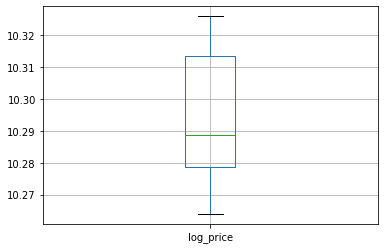

In [28]:
data[['log_price']].boxplot();

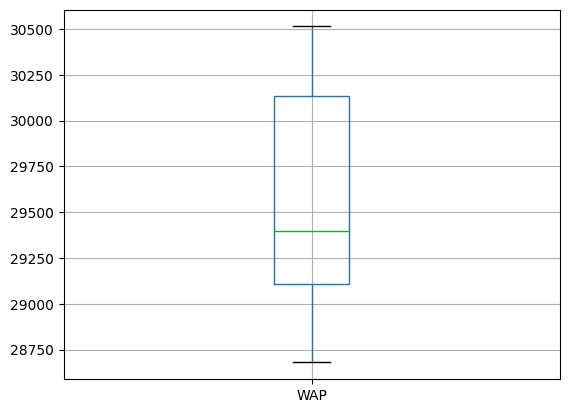

In [29]:
data[['WAP']].boxplot();

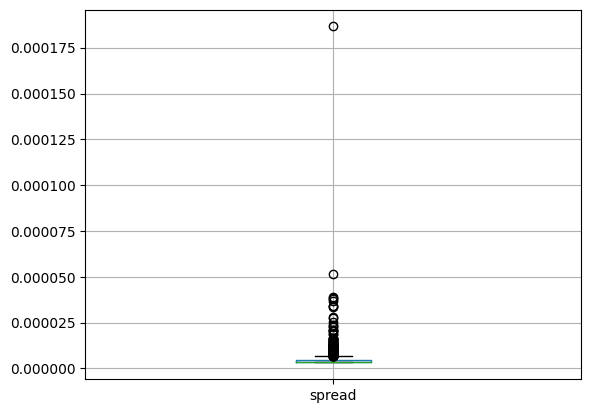

In [30]:
data[['spread']].boxplot();

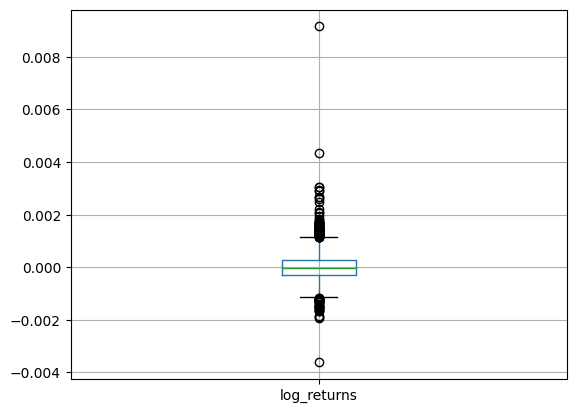

In [31]:
data[['log_returns']].boxplot();

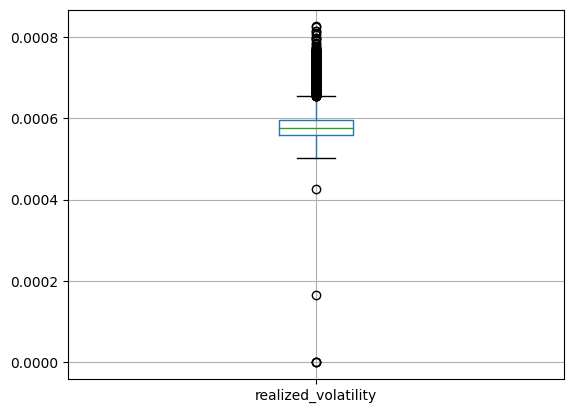

In [32]:
data[['realized_volatility']].boxplot();

# Scaling the Data

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [37]:
data[data.columns] = scaler.fit_transform(data)

In [38]:
data

,log_price,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,bp5,...,as19,ap20,as20,WAP,spread,log_returns,realized_volatility,bid depth,ask depth,FDOFI
primary_key,,,,,,,,,,,,,,,,,,,,,
2022-05-19 00:00:15,0.022792,0.022122,0.017682,0.022097,0.010072,0.022076,0.016586,0.021914,0.014328,0.021840,...,0.077064,0.022187,0.169244,0.022108,0.064543,0.381071,0.000000,0.073940,0.149910,0.639872
2022-05-19 00:00:45,0.043030,0.041692,0.007254,0.041750,0.002395,0.041730,0.015180,0.041717,0.020940,0.041636,...,0.085127,0.042124,0.127689,0.041766,0.038022,0.381097,0.000000,0.024647,0.256198,0.267512
2022-05-19 00:01:15,0.057948,0.056277,0.006663,0.056235,0.003838,0.056147,0.010647,0.056145,0.010836,0.056107,...,0.037006,0.057108,0.056464,0.056272,0.011147,0.355279,0.000000,0.020316,0.100860,0.439577
2022-05-19 00:01:45,0.061742,0.059967,0.006642,0.059853,0.002448,0.059852,0.006432,0.059911,0.009208,0.059876,...,0.056320,0.060308,0.051441,0.059963,0.011140,0.301312,0.199778,0.017963,0.139749,0.345256
2022-05-19 00:02:15,0.061180,0.059374,0.005907,0.059348,0.002445,0.059357,0.010483,0.059362,0.006564,0.059318,...,0.048770,0.059840,0.055214,0.059416,0.023907,0.280179,0.514418,0.015232,0.105190,0.376714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19 23:57:45,0.907378,0.904823,0.018769,0.904834,0.002965,0.904897,0.005247,0.904900,0.009869,0.904878,...,0.122925,0.903624,0.105144,0.904752,0.000064,0.314677,0.676257,0.017869,0.104124,0.408075
2022-05-19 23:58:15,0.901098,0.898348,0.004719,0.898378,0.003116,0.898324,0.007901,0.898278,0.001949,0.898280,...,0.093584,0.897528,0.206182,0.898314,0.000071,0.252438,0.676196,0.017467,0.151608,0.322110
2022-05-19 23:58:45,0.897040,0.894213,0.011522,0.894144,0.004440,0.894151,0.005782,0.894146,0.009229,0.894110,...,0.088406,0.893198,0.097990,0.894154,0.000076,0.263214,0.676141,0.017791,0.111075,0.393519


(array([3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.509e+03, 1.037e+03, 1.980e+02, 1.310e+02]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

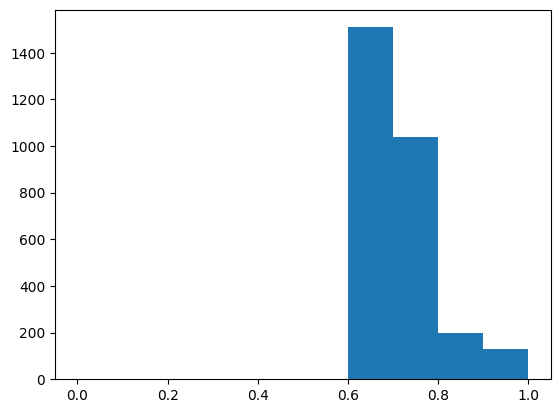

In [39]:
plt.hist(data['realized_volatility'])

In [40]:
data[data['realized_volatility']>0.8]

,log_price,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,bp5,...,as19,ap20,as20,WAP,spread,log_returns,realized_volatility,bid depth,ask depth,FDOFI
primary_key,,,,,,,,,,,,,,,,,,,,,
2022-05-19 00:03:15,0.057502,0.055848,0.020603,0.055902,0.002884,0.055851,0.006285,0.055809,0.009861,0.055751,...,0.042328,0.056349,0.032015,0.055838,0.016399,0.316862,0.827435,0.025899,0.096187,0.498879
2022-05-19 00:04:15,0.033207,0.032235,0.011816,0.032240,0.002573,0.032265,0.017180,0.032212,0.005276,0.032187,...,0.047742,0.032403,0.100808,0.032222,0.001698,0.244280,0.910034,0.037684,0.117397,0.538646
2022-05-19 00:04:45,0.027713,0.026938,0.009392,0.026915,0.005885,0.026950,0.023109,0.026951,0.018008,0.026921,...,0.033343,0.027152,0.101570,0.026886,0.001750,0.256248,0.890924,0.035931,0.067469,0.632523
2022-05-19 00:05:15,0.034131,0.033112,0.012784,0.033061,0.001647,0.033098,0.014571,0.033095,0.018498,0.033097,...,0.052066,0.033223,0.056029,0.033119,0.009924,0.314040,0.855142,0.024876,0.080310,0.526290
2022-05-19 00:05:45,0.018514,0.017983,0.021139,0.017995,0.003742,0.018149,0.030841,0.018198,0.017691,0.018198,...,0.049139,0.018350,0.032784,0.017956,0.003933,0.207138,0.821965,0.080561,0.070248,0.777995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-19 04:58:15,0.230781,0.225281,0.007587,0.225252,0.001719,0.225390,0.010510,0.225395,0.015366,0.225367,...,0.038233,0.224914,0.047783,0.225311,0.016151,0.261085,0.802186,0.032642,0.100761,0.538713
2022-05-19 04:58:45,0.220916,0.215632,0.036899,0.215658,0.001006,0.215724,0.074422,0.215765,0.006074,0.215750,...,0.030960,0.215657,0.042932,0.215613,0.010854,0.235042,0.801651,0.056037,0.071885,0.710185
2022-05-19 04:59:15,0.226664,0.221305,0.020301,0.221348,0.006375,0.221378,0.011044,0.221400,0.009152,0.221410,...,0.052664,0.221200,0.072955,0.221263,0.002402,0.310796,0.801593,0.027973,0.082713,0.544838


In [41]:
np.percentile(data['realized_volatility'], 25)

0.6751168009091766

Let's keep the levels this way, and compare as we keep improving the models. Keep in mind that it is only a *30 minute snapchot* thus it might not have captured the real level of volatility

In [42]:
data['volatility_levels'] = pd.cut(x = data['realized_volatility'],
                       bins=[data['realized_volatility'].min()-1,
                             np.percentile(data['realized_volatility'], 25),
                             np.percentile(data['realized_volatility'], 50),
                             np.percentile(data['realized_volatility'],75),
                             data['realized_volatility'].max()+1], 
                       labels=['low', 'low-to-medium', 'medium-to-high' ,'high'])

In [43]:
data.tail()

,log_price,bp1,bs1,bp2,bs2,bp3,bs3,bp4,bs4,bp5,...,ap20,as20,WAP,spread,log_returns,realized_volatility,bid depth,ask depth,FDOFI,volatility_levels
primary_key,,,,,,,,,,,,,,,,,,,,,
2022-05-19 23:57:45,0.907378,0.904823,0.018769,0.904834,0.002965,0.904897,0.005247,0.904900,0.009869,0.904878,...,0.903624,0.105144,0.904752,0.000064,0.314677,0.676257,0.017869,0.104124,0.408075,low-to-medium
2022-05-19 23:58:15,0.901098,0.898348,0.004719,0.898378,0.003116,0.898324,0.007901,0.898278,0.001949,0.898280,...,0.897528,0.206182,0.898314,0.000071,0.252438,0.676196,0.017467,0.151608,0.322110,low-to-medium
2022-05-19 23:58:45,0.897040,0.894213,0.011522,0.894144,0.004440,0.894151,0.005782,0.894146,0.009229,0.894110,...,0.893198,0.097990,0.894154,0.000076,0.263214,0.676141,0.017791,0.111075,0.393519,low-to-medium
2022-05-19 23:59:15,0.897421,0.894584,0.013036,0.894569,0.001802,0.894742,0.031284,0.894712,0.048701,0.894641,...,0.893706,0.063823,0.894545,0.000075,0.284753,0.676051,0.027510,0.123202,0.459037,low-to-medium
2022-05-19 23:59:45,0.897796,0.894965,0.012252,0.894923,0.002548,0.895127,0.008091,0.895181,0.021924,0.895162,...,0.893793,0.088835,0.894930,0.000075,0.284728,0.675934,0.021191,0.215764,0.278242,low-to-medium


#  Models

## Baseline model

In [44]:
baseline_score = 'low-to-medium'

List of model to try:
- decision trees
- PCA
- Time Series
- RNN
- Logistic regression

In [46]:
train_size = 0.65
index = round(train_size*data.shape[0])
df_train = data.iloc[:index]
df_test = data.iloc[index:]

## Logistic Model

In [47]:
from sklearn.linear_model import LogisticRegression

In [53]:
# Instanciate the model
log = LogisticRegression()
# Define X and y
X = df_train.drop(columns = 'volatility_levels')
y = df_train['volatility_levels']
X_test = df_test.drop(columns = 'volatility_levels')
y_test = df_test['volatility_levels']
# Train the model on the data
log.fit(X, y)

/Users/marcostellez/.pyenv/versions/3.8.13/envs/thalassa_trading/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
log.score(X_test,y_test)

0.3521825396825397

## Decision Trees